# ***Zomato Restaurant Clustering and Sentiment Analysis***

### **Project Overview**

This project leverages data from Zomato, India's leading food technology platform established by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato operates as a comprehensive restaurant discovery service that aggregates dining establishments, provides menu information, customer ratings, and facilitates food delivery partnerships across major Indian cities.

India's rich culinary heritage is reflected in its vast array of dining establishments and food service venues, showcasing the country's cultural diversity through cuisine. The restaurant industry in India is experiencing continuous growth as consumers increasingly embrace dining out and food delivery services. The expanding network of restaurants across Indian states offers valuable opportunities to analyze market data and derive insights about the food service landscape in different cities. This study focuses on examining Zomato's restaurant database to understand clustering patterns and customer sentiment across Indian markets.

**Dataset Overview:**

The analysis employs two complementary datasets with descriptive column structures:

1. **Restaurant Profiles Metadata** - Contains establishment metadata ideal for segmentation and clustering analysis. This dataset provides detailed information about cuisine types, pricing tiers, and operational attributes, enabling market categorization and competitive positioning studies.

2. **Restaurants Review Data** - Features user-generated content perfect for sentiment analysis and opinion mining. The dataset includes reviewer profile information and engagement metrics, allowing for the identification of influential food reviewers and industry thought leaders.

**Project Scope:**
This initiative aims to discover restaurant clusters based on operational characteristics while simultaneously analyzing customer sentiment patterns to provide comprehensive insights into India's restaurant ecosystem through advanced data mining and natural language processing techniques.

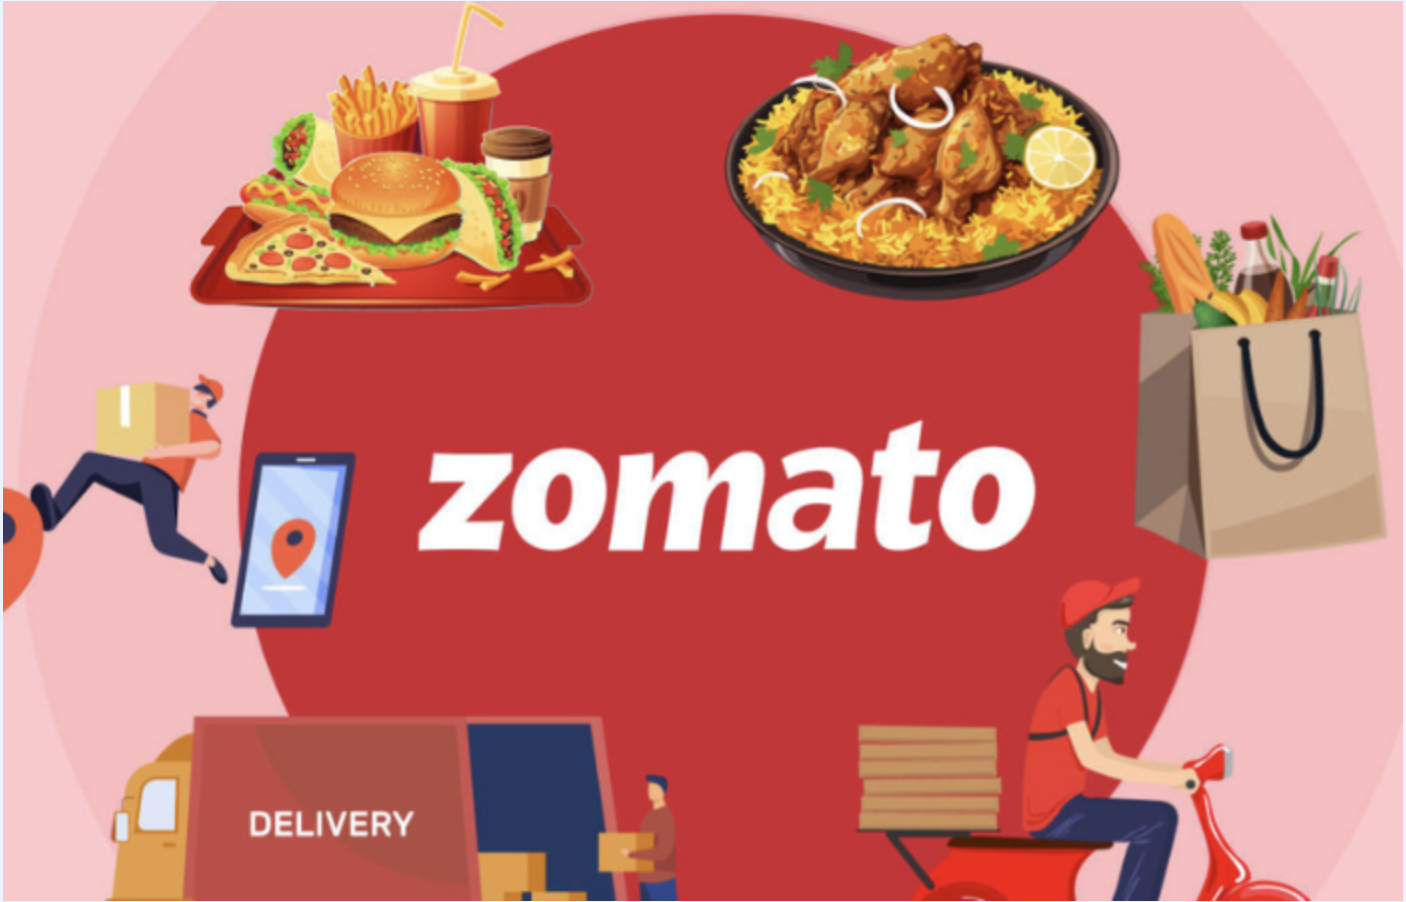

In [415]:
from IPython.display import Image, display

display(Image(filename='zomato-poster.png',width=1000))

### Major steps
- Know your data
- Data Wrangling
- Understanding dataset variable
- Data Vizualization & Experimenting with charts
- Understand the relationships between variables
- Text preprocessing on both datasets
- LDA (Latent Dirichlet Allocation)
- Sentiment Analysis
- Clustering
- K-means Clustering
- Conclusion




# 1. Know your data

### Importing libraries

In [416]:
# Import Libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import gensim

import warnings
warnings.filterwarnings('ignore')

In [417]:
# Loading Zomato Restaurant names and Metadata Dataset 
restaurant_metadata_main=pd.read_csv('Restaurant names and Metadata.csv')

In [418]:
restaurant_metadata=restaurant_metadata_main.copy()

#Loading Zomato Restaurant reviews Dataset
review=pd.read_csv('Zomato Restaurant reviews.csv')

### Dataset first view


In [419]:
# Restuarant Metadata Data
restaurant_metadata.head()

Name                                              Links   Cost                                        Collections                                           Cuisines                                            Timings
0                 Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...    800  Food Hygiene Rated Restaurants in Hyderabad, C...  Chinese, Continental, Kebab, European, South I...      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)
1                        Paradise  https://www.zomato.com/hyderabad/paradise-gach...    800                                Hyderabad's Hottest                     Biryani, North Indian, Chinese                                     11 AM to 11 PM
2                        Flechazo  https://www.zomato.com/hyderabad/flechazo-gach...  1,300                 Great Buffets, Hyderabad's Hottest       Asian, Mediterranean, North Indian, Desserts              11:30 AM to 4:30 PM, 6:30 PM to 11 PM
3  Shah Ghouse Hotel & Restaurant  https://www.zomato.com/hyderabad/shah-ghouse-h...    800                             Late Night Restaurants  Biryani, North Indian, Chinese, Seafood, Bever...                                    12 Noon to 2 AM
4      Over The Moon Brew Company  https://www.zomato.com/hyderabad/over-the-moon...  1,200  Best Bars & Pubs, Food Hygiene Rated Restauran...  Asian, Continental, North Indian, Chinese, Med...  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [420]:
# Review of Restuarant Metadata
review.head()

Restaurant              Reviewer                                             Review Rating                 Metadata             Time  Pictures
0  Beyond Flavours     Rusha Chakraborty  The ambience was good, food was quite good . h...      5   1 Review , 2 Followers  5/25/2019 15:54         0
1  Beyond Flavours  Anusha Tirumalaneedi  Ambience is too good for a pleasant evening. S...      5  3 Reviews , 2 Followers  5/25/2019 14:20         0
2  Beyond Flavours       Ashok Shekhawat  A must try.. great food great ambience. Thnx f...      5  2 Reviews , 3 Followers  5/24/2019 22:54         0
3  Beyond Flavours        Swapnil Sarkar  Soumen das and Arun was a great guy. Only beca...      5    1 Review , 1 Follower  5/24/2019 22:11         0
4  Beyond Flavours                Dileep  Food is good.we ordered Kodi drumsticks and ba...      5  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [421]:
# Size of Restuarant Metadata Dataset
restaurant_metadata.shape

(105, 6)

In [422]:
# Size of Review Dataset
review.shape

(10000, 7)

### Datasets Information


Ensures data is clean before processing.

In [423]:
# Restuarant Metadata Info
restaurant_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [424]:
# Review Info
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


### Describing Datasets

In [425]:
restaurant_metadata.describe(include='all')

Name                                              Links Cost                                  Collections               Cuisines         Timings
count               105                                                105  105                                           51                    105             104
unique              105                                                105   29                                           42                     92              77
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  500  Food Hygiene Rated Restaurants in Hyderabad  North Indian, Chinese  11 AM to 11 PM
freq                  1                                                  1   13                                            4                      4               6

In [426]:
review.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time      Pictures
count             10000         9962   9955   9962      9962             9962  10000.000000
unique              100         7446   9364     10      2477             9782           NaN
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34           NaN
freq                100           13    237   3832       919                3           NaN
mean                NaN          NaN    NaN    NaN       NaN              NaN      0.748600
std                 NaN          NaN    NaN    NaN       NaN              NaN      2.570381
min                 NaN          NaN    NaN    NaN       NaN              NaN      0.000000
25%                 NaN          NaN    NaN    NaN       NaN              NaN      0.000000
50%                 NaN          NaN    NaN    NaN       NaN              NaN      0.000000
75%                 NaN          NaN    NaN    NaN       NaN              NaN      0.000000
max                 NaN          NaN    NaN    NaN       NaN              NaN     64.000000

# 2. Data Wrangling

Data wrangling (also called data munging) is the process of cleaning, transforming, and preparing raw data into a usable format for analysis, machine learning, or visualization.

### Duplicate Values Count

In [427]:
# Restuarant Metadata Duplicate Value Count
print(len(restaurant_metadata[restaurant_metadata.duplicated()]))

0


In [428]:
# Review Datasaet Duplicate Value Count
print(len(review[review.duplicated()]))

36


In [429]:
# List the duplicate values present in Review dataset
review[review.duplicated()]

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

### Missing/Null Values Check

Preparing to calculate nulls.

**pandas:** .isnull() → marks NaN as True.

**Formula:**

$
Missing\ Count(col) = \sum_{i=1}^n 1[value_i = NaN]
$

Counts missing values per column in restaurant dataset.

In [430]:
# Missing Values/Null Values Count in restaurant_metadata
restaurant_metadata.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

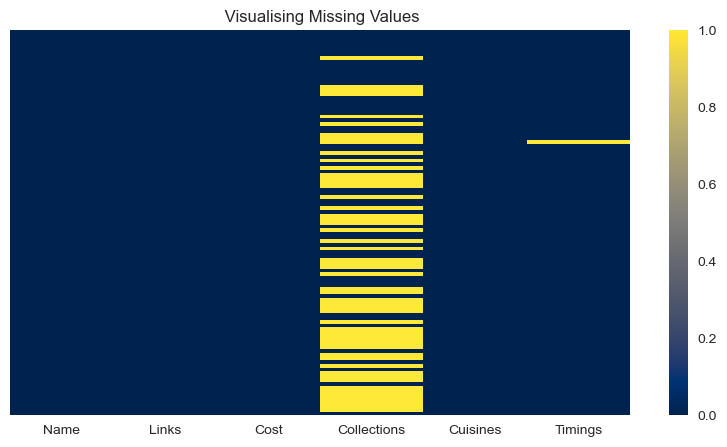

In [431]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(restaurant_metadata.isnull(),cmap='cividis',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values");

In [432]:
# Missing Values/Null Values Count in review
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

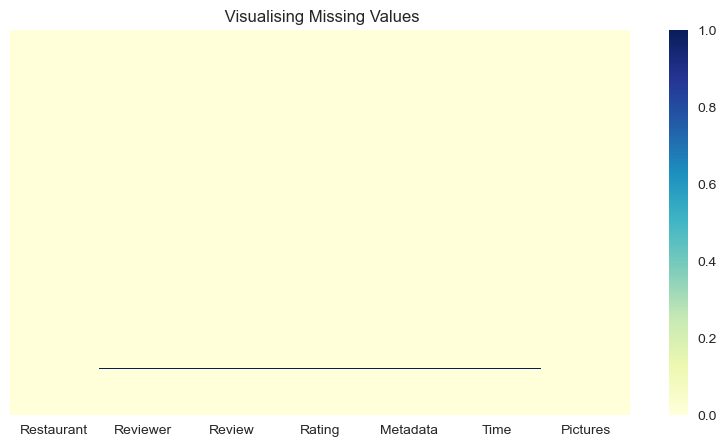

In [433]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(review.isnull(),cmap='YlGnBu',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values");

#### What all we have concluded from our data till now

# 3. Understanding dataset variable

### Datasets Columns

In [434]:
restaurant_metadata.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [435]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures'], dtype='object')

### Dataset Variables Description

#### Zomato Metadata Dataset 
- Name : Name of Restaurants

- Links : URL Links of Restaurants

- Cost : Per person estimated Cost of dining

- Collection : Tagging of Restaurants w.r.t. Zomato categories

- Cuisines : Cuisines served by Restaurants

- Timings : Restaurant Timings

#### Zoamto Review Dataset

- Restaurant : Name of the Restaurant

- Reviewer : Name of the Reviewer

- Review : Review Text

- Rating : Rating Provided by Reviewer

- MetaData : Reviewer Metadata - No. of Reviews and followers

- Time: Date and Time of Review

- Pictures : No. of pictures posted with review

### Data Wrangling on "restaurant_metadata"

In [436]:
# Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'.
restaurant_metadata["Cost"] = restaurant_metadata["Cost"].str.replace(",","").astype('int64')
restaurant_metadata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.1+ KB


# 4. Data Vizualization & Experimenting with charts : Understand the relationships between variables

##### Moving into EDA (Exploratory Data Analysis)
Exploratory Data Analysis (EDA) in Python is the process of analyzing datasets to summarize their main characteristics, discover patterns, identify outliers, and understand relationships between variables

### Chart 1: Word Cloud for Expensive Restaurants

**Library:** WordCloud

**Formula:** Word frequency → bigger word = more frequent.

Helps visualize common keywords in reviews.

In [517]:
# Chart - 1 visualization code.
top10_res_by_cost = restaurant_metadata[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)
     

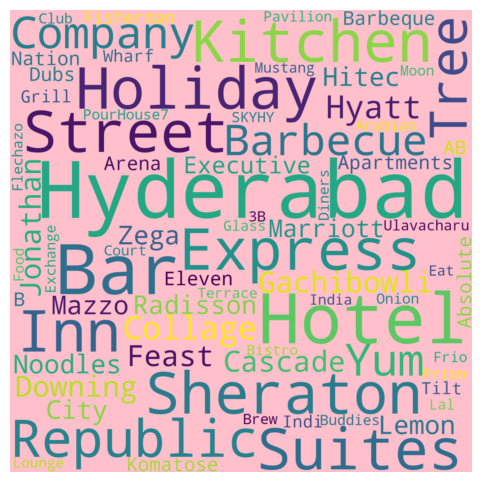

In [518]:

# Creating word cloud for expensive restaurants
plt.figure(figsize=(10,6))
text = " ".join(name for name in restaurant_metadata.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'pink').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off");

### Chart 2: Word Cloud for Cheapest Restaurants

(-0.5, 399.5, 199.5, -0.5)

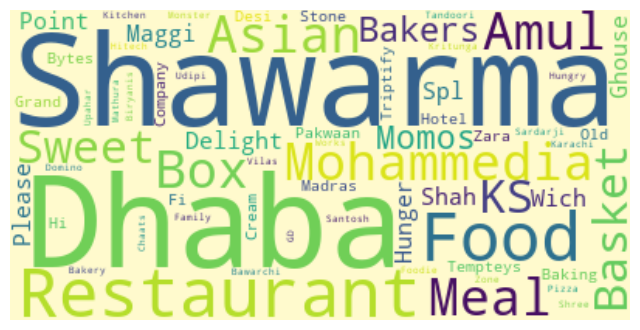

In [519]:
# Creating word cloud for cheapest restaurants
plt.figure(figsize=(8,6))
text = " ".join(name for name in restaurant_metadata.sort_values('Cost',ascending=True).Name[:30])

# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(background_color="lemonchiffon").generate(text)

# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear');

plt.axis("off")

### Chart 3

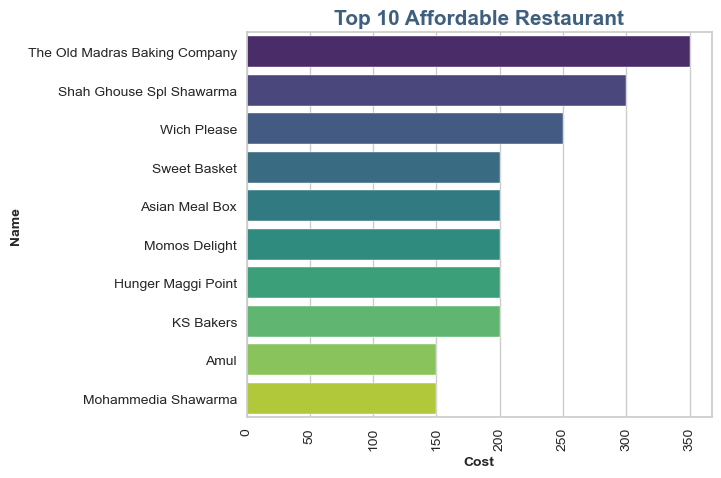

In [440]:
# Affordable price restaurants.

plt.figure(figsize=(6,5))

# Performing groupby To get values accourding to Names and sort it for visualisation.
top_10_affor_rest=restaurant_metadata[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)

# Lables for X and Y axis
x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']

# Assigning the arguments for chart
plt.title("Top 10 Affordable Restaurant",fontsize=15, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=10)
plt.xlabel("Cost",weight='bold',fontsize=10)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='viridis')
plt.show()

### Chart 4

<Axes: ylabel='Collections'>

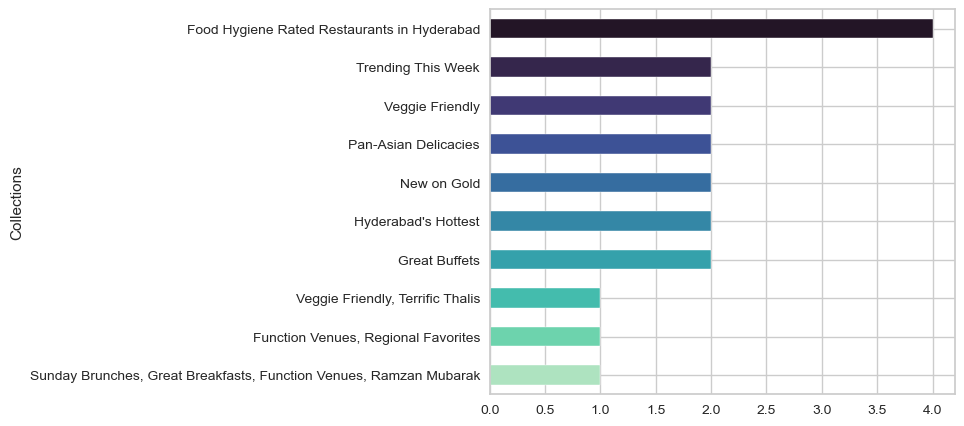

In [441]:
# Visualisation the value counts of collection. 
restaurant_metadata['Collections'].value_counts()[0:10].sort_values().plot(figsize=(6,5),kind='barh',color=sns.color_palette("mako_r",10))

# 5. Text Preprocessing  
We prepare the reviews for NLP by cleaning text:  
- Lowercasing  
- Removing punctuation/numbers  
- Removing unwanted characters  
- Removing stopwords  
- Tokenization  
- Stemming/Lemmatization

### 5.1 Text preprocessing on "restaurant_metadata" Dataset

In Order to plot the cuisines from the data we have to count the frequency of the words from the document.(Frequency of cuisine). For that We have to perform the opration like removing stop words, Convert all the text into lower case, removing punctuations, removing repeated charactors, removing Numbers and emojies and finally count vectorizer.

**Library used:** `nltk`  

- `word_tokenize()` → splits review text into words.  
- `stopwords.words('english')` → removes common filler words ("the", "is").  

**Formula:**  
$
Tokens = [w \in Review \ | \ w \notin Stopwords]
$

**Stemming:** Reduces a word to its base/root form.  

Example:  
- "cooking", "cooked", "cooks" → "cook"  

**Formula:**  
$
Stem(w) = Root(w)
$

In [520]:
# Downloading and importing the dependancies for text cleaning.
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madhutomar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopwords are common, high-frequency words like "the," "and," and "is" that are filtered out before text analysis because they typically carry little meaning on their own.

In [443]:
# Extracting the stopwords from nltk library for English corpus.
sw = stopwords.words('english')

### Removing Stopwords

In [444]:
# Creating a function for removing stopwords.
def stopwords(text):
    '''a function for removing the stopword'''

    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in str(text).split() if word.lower() not in sw]

    # joining the list of words with space separator
    return " ".join(text)
     

In [445]:
# Removing stopwords from Cuisines.
restaurant_metadata['Cuisines'] = restaurant_metadata['Cuisines'].apply(lambda text: stopwords(text))
restaurant_metadata['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

Stop words are removed successfully

### Removing Punctuation

In [446]:
# Defining the function for removing punctuation.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string

    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [447]:
# Removing punctuation from Cuisines.
restaurant_metadata['Cuisines'] = restaurant_metadata['Cuisines'].apply(lambda x: remove_punctuation(x))
restaurant_metadata['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

Punctuations present in the text are removed successfully

### Removing Repeated Characters

In [448]:
# Cleaning and removing repeated characters.
import re

# Writing a function to remove repeating characters.
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
     


In [449]:
# Removing repeating characters from Cuisines.
restaurant_metadata['Cuisines'] = restaurant_metadata['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
restaurant_metadata['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

Removed repeated characters successfully

### Removing Numbers

In [450]:
# Defining a function to remove numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
     

In [451]:
# Removing numbers
restaurant_metadata['Cuisines'] = restaurant_metadata['Cuisines'].apply(lambda x: cleaning_numbers(x))
restaurant_metadata['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

We don't want numbers in the text, hence removed number successfully

In [452]:
# Top 20 Two word Frequencies of Cuisines.
from collections import Counter 
text = ' '.join(restaurant_metadata['Cuisines'])

# separating each word from the sentences
words = text.split()

# Extracting the first word from the number for cuisines in the sentence.
two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [453]:
# Extracting the most frequent cuisine present in the collection.
# Counting a frequency for cuisines.
two_words_dfc = pd.DataFrame(two_words.items(), columns=['Cuisine Words', 'Frequency'])

# Sorting the most frequent cuisine at the top and order by descending
two_words_dfc = two_words_dfc.sort_values(by = "Frequency", ascending = False)

# selecting first top 20 frequent cuisine.
two_words_20c = two_words_dfc[:20]
two_words_20c

Cuisine Words  Frequency
6           north indian         61
9         indian chinese         27
42             fast food         15
4           south indian          9
5           indian north          9
33         chinese north          8
24    indian continental          6
65         italian north          6
8          biryani north          6
28            food north          6
93   continental italian          6
0    chinese continental          5
34          indian kebab          3
84          indian asian          3
77        indian mughlai          3
19     continental north          3
54       chinese biryani          3
105        desserts cafe          3
53           burger fast          3
18     asian continental          3

### Chart 5

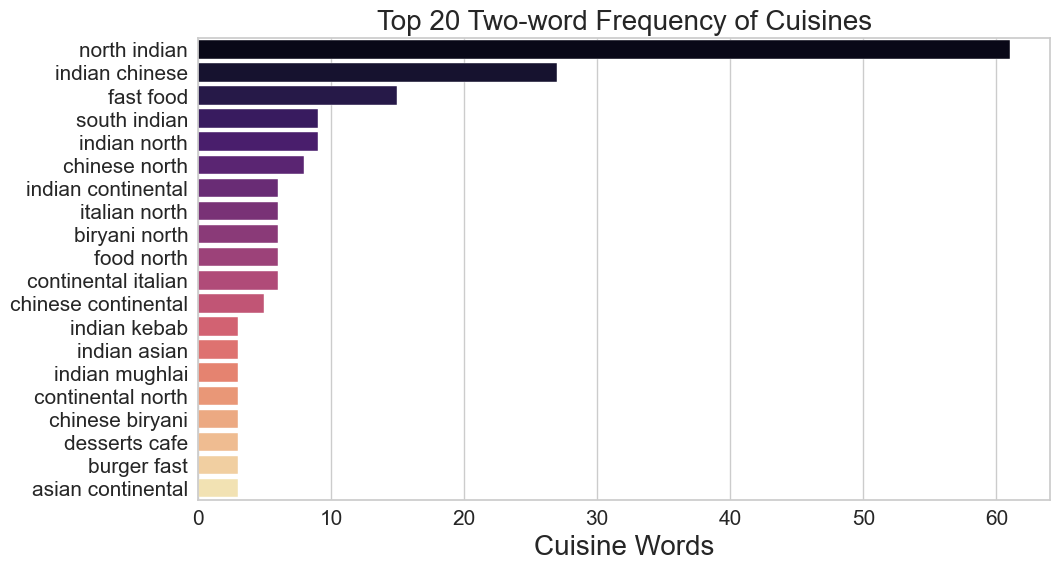

In [454]:
# Visualizing the frequency of the Cuisines.

sns.set_style("whitegrid")
plt.figure(figsize = (11, 6))
sns.barplot(y = "Cuisine Words", x = "Frequency", data = two_words_20c, palette = "magma")
plt.title("Top 20 Two-word Frequency of Cuisines", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Cuisine Words", size = 20)
plt.ylabel(None)
plt.savefig("Top_20_Two-word_Frequencies_of_Cuisines.png")
plt.show()

The DataFrame contains two columns: "Cuisine Words" and "Frequency." The "Cuisine Words" column lists the most frequent two-word cuisine terms, while the "Frequency" column shows the number of times each two-word cuisine term appears in the dataset.This information can be helpful in understanding the most common cuisine types in the dataset. It can also be used to identify trends and patterns in the types of cuisines that are popular or in demand among the customers.

### 5.2 Text preprocessing on "review" Dataset

### Data Wrangling on "review"

In [455]:
# proportion or percentage of occurrences for each unique value in the Rating column.
review['Rating'].value_counts(normalize=True)

Rating
5       0.384662
4       0.238205
1       0.174162
3       0.119755
2       0.068661
4.5     0.006926
3.5     0.004718
2.5     0.001907
1.5     0.000903
Like    0.000100
Name: proportion, dtype: float64

In [456]:
# Removing like value and taking the mean in the rating column.
review.loc[review['Rating'] == 'Like'] = np.nan

 # Chenging the data type of rating column 
review['Rating']= review['Rating'].astype('float64')

print(review['Rating'].mean())

3.601044071880333


In [457]:
# Filling mean in place of null value
review['Rating'].fillna(3.6, inplace=True)

In [458]:

# Changing the data type of review column.
review['Review'] = review['Review'].astype(str)

# Creating a review_length column to check the frequency of each rating.
review['Review_length'] = review['Review'].apply(len)

In [459]:
review['Rating'].value_counts(normalize=True)

Rating
5.0    0.3832
4.0    0.2373
1.0    0.1735
3.0    0.1193
2.0    0.0684
4.5    0.0069
3.5    0.0047
3.6    0.0039
2.5    0.0019
1.5    0.0009
Name: proportion, dtype: float64

The Ratings distribution 38% reviews are 5 rated,23% are 4 rated stating that people do rate good food high.

### Chart 6

In [460]:
# Visualizing the rating column against the review length.
# Polting the frequency of the rating on scatter bar plot

import plotly.express as px
fig = px.scatter(review, x=review['Rating'], y=review['Review_length'])
fig.update_layout(title_text="Rating vs Review_Length", width=800, height=500)
fig.update_xaxes(ticks="outside", tickwidth=1, tickcolor='crimson',tickangle=0, ticklen=10)
fig.show()

The scatter plot confirms that length of review doesn't impact ratings.

### Chart 7

In [461]:
# Creating polarity variable to see sentiments in reviews.(using textblob) 
from textblob import TextBlob
review['Polarity'] = review['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

<Axes: ylabel='Frequency'>

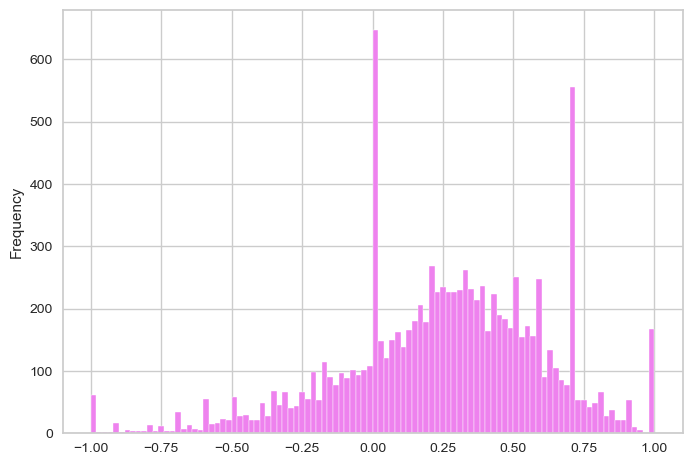

In [462]:
# Visualizing the polarity using histogram.
review['Polarity'].plot(kind='hist', bins=100,color="violet")

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

### Removing Stop Words

Stop words are used in a language to removed from text data during natural language processing. This helps to reduce the dimensionality of the feature space and focus on the more important words in the text.

In [463]:
# Importing dependancies and removing stopwords.

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Creating argument for stop words.
stop_words = stopwords.words('english')

print(stop_words)
rest_word=['order','restaurant','taste','ordered','good','food','table','place','one','also']
rest_word

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madhutomar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['order',
 'restaurant',
 'taste',
 'ordered',
 'good',
 'food',
 'table',
 'place',
 'one',
 'also']

### Removing Special Characters

In [464]:
# Removing Special characters and punctuation from review columns.

import re
review['Review']=review['Review'].map(lambda x: re.sub('[,\.!?]','', x))
review['Review']=review['Review'].map(lambda x: x.lower())
review['Review']=review['Review'].map(lambda x: x.split())
review['Review']=review['Review'].apply(lambda x: [item for item in x if item not in stop_words])
review['Review']=review['Review'].apply(lambda x: [item for item in x if item not in rest_word])

### Chart 8

In [465]:
# We will extrapolate the 15 profiles that have made more reviews.

# Groupby on the basis of rivewer gives the fequency of the reviews
reviewer_list = review.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')

 # Sorting the frequency of reviews decending
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)

# Selecting the top 15 reviewrs
top_reviewers = reviewer_list[:15]

Text(0, 0.5, 'N of reviews')

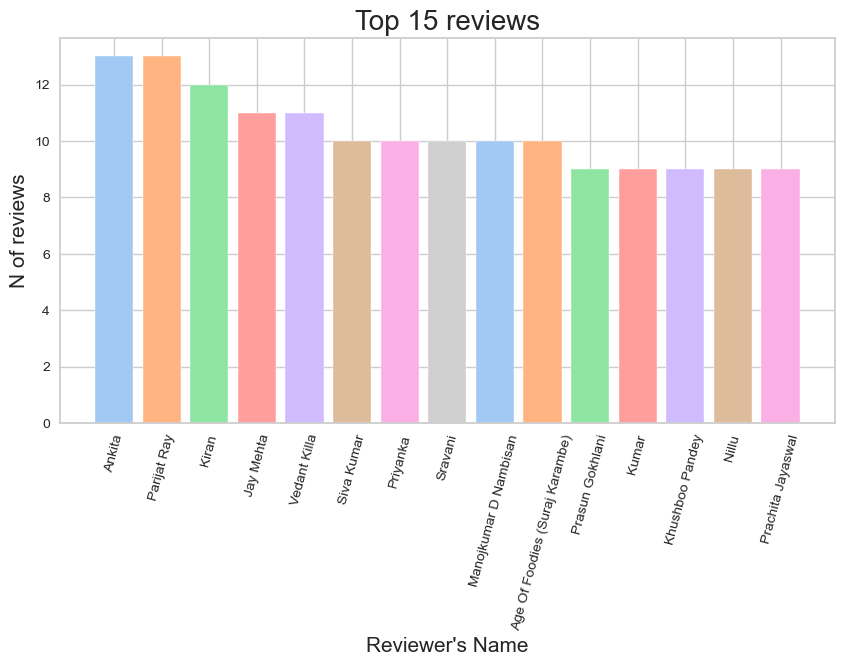

In [466]:
# Visualizing the top 15 reviewers.
plt.figure(figsize=(10,5))
plt.bar(top_reviewers['Reviewer'], top_reviewers['Review_Count'], color = sns.color_palette("pastel", 8))
plt.xticks(rotation=75)
plt.title('Top 15 reviews',size=20)
plt.xlabel("Reviewer's Name",size=15)
plt.ylabel('N of reviews',size=15)

### Chart 9

In [467]:
# Calculate the average of their ratings review.
review_ratings=review.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average_Ratings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:15]

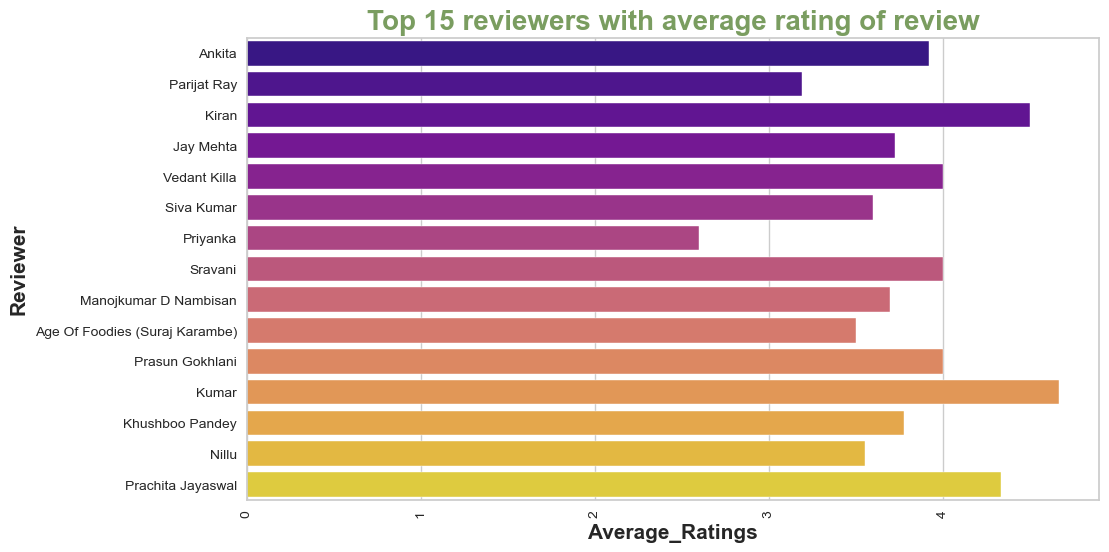

In [468]:
# Average rating of top reviewers.
plt.figure(figsize=(11,6))
x = top_reviewers_ratings['Average_Ratings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 15 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=90)[-5])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Ratings",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

The output of top 15 reviewers based on the number of reviews they have made in a given dataset. Analyzing the reviews made by these top reviewers can help in improving customer satisfaction and loyalty, ultimately leading to increased revenue and growth.

### Chart 10: Word cloud for Positive Reviews

**Summary:** Creates a word cloud for positive reviews

**Explanation:**
- WordCloud (from wordcloud library) generates a cloud where word size = frequency of appearance.
- Used here to visualize most common words in positive reviews.

**Formula/Logic:** WordCloud(text).generate(text_data) → creates frequency-based visualization.


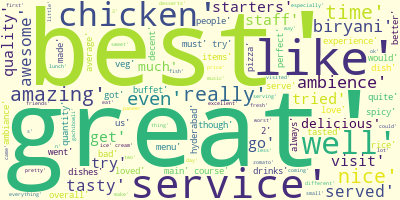

In [469]:
# Word cloud for positive reviews.

from wordcloud import WordCloud
review['Review']=review['Review'].astype(str)

ps = PorterStemmer() 
review['Review']=review['Review'].map(lambda x: ps.stem(x))
long_string = ','.join(list(review['Review'].values))
long_string
wordcloud = WordCloud(background_color="lightyellow", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Service, taste, food, place are the key to good review.

### Chart 11: Word cloud for Negative Reviews

**Summary:** Creates a word cloud for negative reviews

**Explanation:**
- Similar to previous cell but applied to negative reviews.

**Formula/Logic:** WordCloud(text).generate(text_data) → word cloud for negative sentiment.


In [470]:
# Creating two datasets for positive and negative reviews.

review['Rating']= pd.to_numeric(review['Rating'],errors='coerce')   # The to_numeric() function in pandas is used to convert a pandas object to a numeric type.
pos_rev = review[review.Rating>= 3]
neg_rev = review[review.Rating< 3]
     

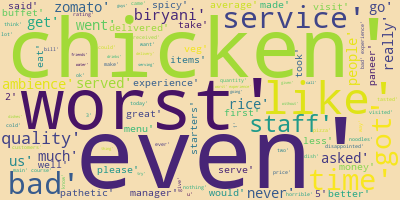

In [471]:
# Negative reviews wordcloud.

long_string = ','.join(list(neg_rev['Review'].values))
long_string
wordcloud = WordCloud(background_color="wheat", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Service, bad chicken, staff behavior, quality are the key reasons for neagtive reviews

### Text Cleaning

In [472]:
# Creating word embeddings (for positive and negative reviews).

from gensim.models import word2vec
pos_rev = review[review.Rating>= 3]
neg_rev = review[review.Rating< 3]

Dataframe where the Rating column is greater than or equal to 3. This selects all the positive reviews where as the Rating column is less than 3. This selects all the negative reviews, assuming that the Rating column is a scale from 1 to 5 with 5 being the highest rating.

### Create a corpus of words from the positive reviews in the neg_rev DataFrame.

In [473]:
# Plot for postive reviews
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Review']:
        for sentence in data[col].items():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus
    
# Display the first two elements of the corpus list
corpus = build_corpus(pos_rev)        
corpus[0:2]
     

[["['ambience',",
  "'quite',",
  "'saturday',",
  "'lunch',",
  "'cost',",
  "'effective',",
  "'sate',",
  "'brunch',",
  "'chill',",
  "'friends',",
  "'parents',",
  "'waiter',",
  "'soumen',",
  "'das',",
  "'really',",
  "'courteous',",
  "'helpful']"],
 ["['ambience',",
  "'pleasant',",
  "'evening',",
  "'service',",
  "'prompt',",
  "'experience',",
  "'soumen',",
  "'das',",
  "'-',",
  "'kudos',",
  "'service']"]]

### Create a corpus of words from the negative reviews in the neg_rev DataFrame.

In [474]:
# Plot for negative reviews.
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Review']:
        for sentence in data[col].items():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus
    
# Display the first two elements of the corpus list
corpus = build_corpus(neg_rev)        
corpus[0:2]

[["['corn',",
  "'cheese',",
  "'balls',",
  "'manchow',",
  "'soup',",
  "'paneer',",
  "'shashlik',",
  "'sizzler',",
  "'sizzler',",
  "'stale',",
  "'paneer',",
  "'smelling',",
  "'waiter',",
  "'impolite',",
  "'even',",
  "'accept',",
  "'mistake',",
  "'never',",
  "'going']"],
 ["['went',",
  "'team',",
  "'lunch',",
  "'worst',",
  "'tasteless',",
  "'service',",
  "'slow',",
  "'ac',",
  "'working',",
  "'we’ve',",
  "'requested',",
  "'multiple',",
  "'times',",
  "'use',",
  "'please',",
  "'don’t',",
  "'waste',",
  "'money',",
  "'strictly',",
  "'recommend',",
  "'prefer',",
  "'beyond',",
  "'flavours']"]]

In [475]:
# Checking for the implimented code
review['Review']

0       ['ambience', 'quite', 'saturday', 'lunch', 'co...
1       ['ambience', 'pleasant', 'evening', 'service',...
2       ['must', 'try', 'great', 'great', 'ambience', ...
3       ['soumen', 'das', 'arun', 'great', 'guy', 'beh...
4       ['goodwe', 'kodi', 'drumsticks', 'basket', 'mu...
                              ...                        
9995    ['madhumathi', 'mahajan', 'well', 'start', 'ni...
9996    ['never', 'disappointed', 'us', 'courteous', '...
9997    ['bad', 'rating', 'mainly', '"chicken', 'bone'...
9998    ['personally', 'love', 'prefer', 'chinese', 'c...
9999    ['checked', 'try', 'delicious', 'chinese', 'se...
Name: Review, Length: 10000, dtype: object

# 7. LDA (Latent Dirichlet Allocation)

##### What is LDA?
- **LDA (Latent Dirichlet Allocation)** is a **topic modeling algorithm**.
- It automatically finds **hidden topics** in a collection of documents (reviews).
- Each review is assumed to be a mixture of topics, and each topic is a collection of words.
- Example:
  - Review: "The delivery was late but food was tasty"
  - LDA might assign:
    - 60% to **Delivery Topic** (words: late, delivery, time)
    - 40% to **Food Topic** (words: tasty, food, delicious)

---

##### Why LDA in Zomato Review Analysis?
- Helps discover **main themes** people talk about:
  - "Food Quality"
  - "Delivery Speed"
  - "Ambience"
  - "Price"
- When combined with **sentiment analysis + clustering**:
  - Cluster reviews into **positive/negative/neutral**.
  - Apply **LDA** on each cluster.
  - Identify **which topics drive positivity or negativity**.

**Example:**
- Positive cluster → Topics: *"delicious food"*, *"great ambience"*
- Negative cluster → Topics: *"late delivery"*, *"poor service"*




**Summary:** Imports libraries for topic modeling (LDA)

**Explanation:**
- gensim.corpora.Dictionary → converts text into word IDs.
- gensim.models.LdaModel → Latent Dirichlet Allocation (LDA) for topic modeling.
**Formula/Logic:**

**LDA:** Each document = mixture of topics, each topic = mixture of words.

In [476]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

Listing the top 10 most occuring words. Topic modeling is a process to automatically identify topics present in a text object and to assign text corpus to one category of topic.



In [477]:
# Assume that documents is a list of strings representing text documents

# Tokenize the documents
tokenized_docs = [simple_preprocess(doc) for doc in review['Review']]

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

# Convert the tokenized documents to a bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train an LDA model on the bag-of-words corpus
num_topics = 10  # The number of topics to extract
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics and their top 10 terms
for topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    print('Topic {}: {}'.format(topic[0], ', '.join([term[0] for term in topic[1]])))

Topic 0: delivery, cake, delivered, time, pizza, cakes, fast, velvet, cheese, red
Topic 1: schezwan, litti, chokha, pulav, boy, hakka, chili, dimsums, screens, costs
Topic 2: even, service, bad, worst, experience, time, zomato, us, never, quality
Topic 3: momos, club, hills, cookies, gobi, cupcakes, packing, branch, future, banjara
Topic 4: service, great, nice, staff, time, visit, awesome, really, us, excellent
Topic 5: chicken, biryani, rice, veg, quantity, fried, spicy, like, soup, noodles
Topic 6: best, chocolate, cream, ice, try, must, love, hyderabad, amazing, delicious
Topic 7: like, paneer, indian, coffee, well, would, get, dishes, try, north
Topic 8: ambience, service, great, nice, really, starters, buffet, veg, staff, amazing
Topic 9: service, ambience, really, donuts, money, burgers, value, quality, wings, try


In [478]:
import gensim 
import pyLDAvis.gensim 
import pyLDAvis.lda_model 
pyLDAvis.enable_notebook()
     

In [479]:
lda_visualization = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary, mds='tsne') 
pyLDAvis.display(lda_visualization)

The topics and topic terms can be visualised to help assess how interpretable the topic model is.

# 8. Sentiment Analysis

### TF-IDF Vectorization

We convert cleaned reviews into numerical form using TF-IDF.

**Library used:** `sklearn.feature_extraction.text.TfidfTransformer`  

**Formula:**  
$
TF\text{-}IDF(t,d) = TF(t,d) \times \log \frac{N}{DF(t)}
$ 

Where:  
- \(TF(t,d)\) = frequency of term *t* in document *d*  
- \(DF(t)\) = number of documents containing *t*  
- \(N\) = total number of documents

### Bag of Words (CountVectorizer)

We also try Bag of Words, which counts the occurrences of each word.

**Library used:** `sklearn.feature_extraction.text.CountVectorizer`  

**Formula:**  
$
Count(t,d) = \sum 1[word_i = t]
$

In [480]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [481]:
# Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

In [482]:
# Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [483]:
# Applying subjectivity and the polarity function to the respective columns
review['Subjectivity'] = review['Review'].apply(subjectivity)
review['Polarity'] = review['Review'].apply(polarity)

In [484]:
# Checking for created columns
review['Polarity']

0       0.600000
1       0.733333
2       0.540000
3       0.800000
4       0.350000
          ...   
9995    0.277841
9996    0.174621
9997    0.082074
9998    0.560000
9999    0.103030
Name: Polarity, Length: 10000, dtype: float64

In [485]:
# Checking for created columns
review['Subjectivity']

0       0.900000
1       0.966667
2       0.740000
3       0.750000
4       0.450000
          ...   
9995    0.646591
9996    0.710606
9997    0.501252
9998    0.620000
9999    0.630303
Name: Subjectivity, Length: 10000, dtype: float64

### Chart 12

In [486]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

If the score is less than 0, the function returns the string 'Negative'. If the score is equal to 0, the function returns the string 'Neutral'. If the score is greater than 0, the function returns the string 'Positive'.

In [487]:
# Apply get analysis function to separate the sentiments from the column
review['Analysis'] = review['Polarity'].apply(getAnalysis)

**Summary:** Calculates sentiment distribution (count of each sentiment type)

**Explanation:**
- value_counts() → counts how many reviews fall under Positive, Negative, Neutral.
- normalizes=True → gives proportion instead of count.

**Formula/Logic:**
-Sentiment Distribution = count(Sentiment) / total_reviews


In [488]:
# plot the polarity and subjectivity
plt.figure(figsize=(5,8))
fig = px.scatter(review, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity',
                 width=900,       
                 height=600,
                color_discrete_map={  
                     "Positive": "seagreen",  
                     "Negative": "crimson",  
                     "Neutral":  "royalblue"   
                 })

# Add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

<Figure size 500x800 with 0 Axes>

The resulting plot can provide several insights into the sentiment analysis results. Firstly, the histogram bars on the left side of the plot (negative polarity) indicate that a significant number of reviews expressed negative sentiments. Similarly, the histogram bars on the right side of the plot (positive polarity) indicate that a significant number of reviews expressed positive sentiments.

Overall, this plot can provide a quick and easy way to visualize the sentiment polarity distribution of the reviews, which can help in understanding the overall sentiment of the customers towards the restaurants.

# 9. Clustering

In [489]:
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning);

In [490]:
# converting the cuisines to lower case

restaurant_metadata_main['Cuisines'] = restaurant_metadata_main['Cuisines'].apply(lambda x : x.lower());

In [491]:
# Separating the Name, cost and cuisines column.
cuisine_df = restaurant_metadata_main.loc[:,['Name','Cost','Cuisines']]

In [492]:
# Overview of separated variables.
cuisine_df.head()

Name   Cost                                           Cuisines
0                 Beyond Flavours    800  chinese, continental, kebab, european, south i...
1                        Paradise    800                     biryani, north indian, chinese
2                        Flechazo  1,300       asian, mediterranean, north indian, desserts
3  Shah Ghouse Hotel & Restaurant    800  biryani, north indian, chinese, seafood, bever...
4      Over The Moon Brew Company  1,200  asian, continental, north indian, chinese, med...

In [493]:
# Removing spces from cuisine column.
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')

# Spliting the Words in cuisine.
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [494]:
# Overview on text cleaning.
cuisine_df.head()

Name   Cost                                           Cuisines
0                 Beyond Flavours    800  [chinese, continental, kebab, european, southi...
1                        Paradise    800                    [biryani, northindian, chinese]
2                        Flechazo  1,300      [asian, mediterranean, northindian, desserts]
3  Shah Ghouse Hotel & Restaurant    800  [biryani, northindian, chinese, seafood, bever...
4      Over The Moon Brew Company  1,200  [asian, continental, northindian, chinese, med...

In [495]:
from sklearn.preprocessing import MultiLabelBinarizer

# converting a list of labels for each sample into a binary indicator matrix
mlb = MultiLabelBinarizer(sparse_output=True)

# converting the Cuisines column in the cuisine_df DataFrame into a binary indicator matrix.
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_)) 

In [496]:
# Overview
cuisine_df.head()
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # adjust as needed

In [497]:
# Checking the unique for rating.
review['Rating'].unique()
  

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5, 3.6])

In [498]:
# Remove nan rating in Rating column.
review.dropna(subset=['Rating'],inplace=True)

In [499]:
# Change data type of rating column to float.
review['Rating']= review['Rating'].astype('float')

In [500]:
# Dropping the null Values from review column.
review.dropna(subset =['Review'], inplace=True)

In [501]:
# Grouping the restaurant on the basis of average rating.
ratings_df = review.groupby('Restaurant')['Rating'].mean().reset_index()

In [502]:
# Top highly rated 15 restaurants.
ratings_df .sort_values(by='Rating',ascending = False).head(15)

Restaurant  Rating
3                 AB's - Absolute Barbecues   4.880
11                                   B-Dubs   4.810
2            3B's - Buddies, Bar & Barbecue   4.760
67                                 Paradise   4.700
35                                 Flechazo   4.660
87                           The Indi Grill   4.600
97          Zega - Sheraton Hyderabad Hotel   4.450
64               Over The Moon Brew Company   4.340
16                          Beyond Flavours   4.280
19  Cascade - Radisson Hyderabad Hitec City   4.260
84                    The Fisherman's Wharf   4.220
34         Feast - Sheraton Hyderabad Hotel   4.220
71                     Prism Club & Kitchen   4.215
58    Mazzo - Marriott Executive Apartments   4.190
13                          Barbeque Nation   4.120

In [503]:
#  Combining the information on restaurant cuisine and ratings into a single DataFrame.
cluster_df = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

In [504]:
# Overview
cluster_df.head()

Name   Cost  american  andhra  arabian  asian  bakery  bbq  beverages  biryani  burger  cafe  chinese  continental  desserts  european  fastfood  fingerfood  goan  healthyfood  hyderabadi  icecream  indonesian  italian  japanese  juices  kebab  lebanese  malaysian  mediterranean  mexican  mithai  modernindian  momos  mughlai  northeastern  northindian  pizza  salad  seafood  southindian  spanish  streetfood  sushi  thai  wraps                      Restaurant  Rating
0                 Beyond Flavours    800         0       0        0      0       0    0          0        0       0     0        1            1         0         1         0           0     0            0           0         0           0        0         0       0      1         0          0              0        0       0             0      0        0             0            1      0      0        0            1        0           0      0     0      0                 Beyond Flavours    4.28
1                        Paradise    800         0       0        0      0       0    0          0        1       0     0        1            0         0         0         0           0     0            0           0         0           0        0         0       0      0         0          0              0        0       0             0      0        0             0            1      0      0        0            0        0           0      0     0      0                        Paradise    4.70
2                        Flechazo  1,300         0       0        0      1       0    0          0        0       0     0        0            0         1         0         0           0     0            0           0         0           0        0         0       0      0         0          0              1        0       0             0      0        0             0            1      0      0        0            0        0           0      0     0      0                        Flechazo    4.66
3  Shah Ghouse Hotel & Restaurant    800         0       0        0      0       0    0          1        1       0     0        1            0         0         0         0           0     0            0           0         0           0        0         0       0      0         0          0              0        0       0             0      0        0             0            1      0      0        1            0        0           0      0     0      0  Shah Ghouse Hotel & Restaurant    3.21
4      Over The Moon Brew Company  1,200         0       0        0      1       0    0          0        0       0     0        1            1         0         0         0           0     0            0           0         0           0        0         0       0      0         0          0              1        0       0             0      0        0             0            1      0      0        0            0        0           0      0     0      0      Over The Moon Brew Company    4.34

###  Changing name and order of columns

In [505]:
# List of desired columns in order
cols = ['Name', 'Cost','Rating', 'american', 'andhra', 'arabian', 'asian', 'bbq',
       'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps']

# Keep only columns that exist in cluster_df
cols_present = [c for c in cols if c in cluster_df.columns]

# Reorder safely
cluster_df = cluster_df[cols_present]


In [506]:
# Checking the data type and null counts for newly created variables.
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype           
---  ------         --------------  -----           
 0   Name           100 non-null    object          
 1   Cost           100 non-null    object          
 2   Rating         100 non-null    float64         
 3   american       1 non-null      Sparse[int64, 0]
 4   andhra         1 non-null      Sparse[int64, 0]
 5   arabian        1 non-null      Sparse[int64, 0]
 6   asian          1 non-null      Sparse[int64, 0]
 7   bbq            1 non-null      Sparse[int64, 0]
 8   bakery         1 non-null      Sparse[int64, 0]
 9   beverages      1 non-null      Sparse[int64, 0]
 10  biryani        1 non-null      Sparse[int64, 0]
 11  burger         1 non-null      Sparse[int64, 0]
 12  cafe           1 non-null      Sparse[int64, 0]
 13  chinese        1 non-null      Sparse[int64, 0]
 14  continental    1 non-null      Sparse[int64

### Chart 13

In [507]:
# Removing commas from the cost variables.
cluster_df['Cost']= cluster_df['Cost'].replace({',': ''}, regex=True)

# Changing the data type of the cost column.
cluster_df['Cost']= cluster_df['Cost'].astype('float')

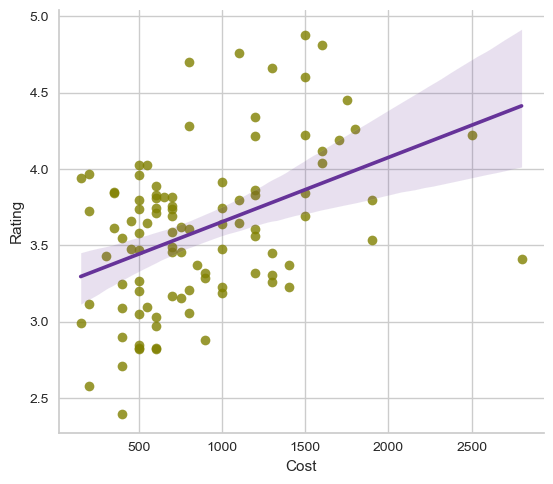

In [508]:
# Visualising relationship between the cost of a meal and the rating of a restaurant
sns.lmplot(y='Rating',x='Cost',data=cluster_df,line_kws={'color' :'rebeccapurple'},scatter_kws={'color': 'olive'},height=5, aspect=11.7/10.27)

The resulting plot shows the relationship between the cost of a meal and the rating of a restaurant, with the regression line indicating the general trend in the data. This can help identify any patterns or correlations between cost and rating.

# 10. K-means Clustering

In [509]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

### Chart 14

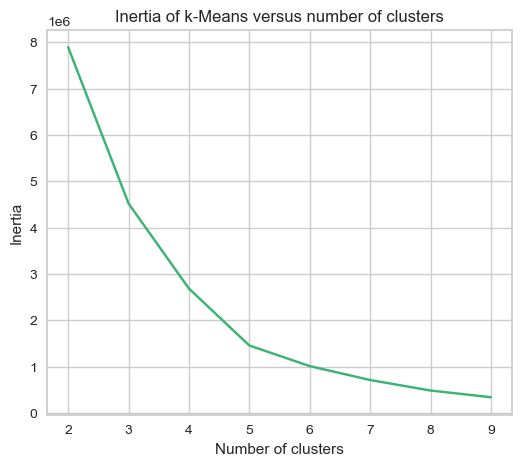

In [510]:
# Create a list of inertia scores for different numbers of clusters
scores = [KMeans(n_clusters=i+2, random_state=11).fit(cluster_df.drop('Name',axis=1)).inertia_ 
          for i in range(8)]

# Create a line plot of inertia scores versus number of clusters
plt.figure(figsize=(6,5))
sns.lineplot(x=np.arange(2, 10), y=scores,color="mediumseagreen")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia of k-Means versus number of clusters')
plt.show()
     

The plot can help to identify the optimal number of clusters based on the elbow point of the curve, where the rate of decrease in inertia score slows down significantly.

In [511]:
# Initializing a K-Means clustering model with number of clusters and random state.
model = KMeans(random_state=11, n_clusters=5)
model.fit(cluster_df.drop('Name',axis=1))

KMeans(n_clusters=5, random_state=11)

In [512]:
# predict the cluster label of a new data point based on a trained clustering model.
cluster_lbl = model.predict(cluster_df.drop('Name',axis=1))
cluster_df['labels'] = cluster_lbl

In [513]:
# Creating the data frame for each cluster.
cluster_0 = cluster_df[cluster_df['labels'] == 0].reset_index()
cluster_1 = cluster_df[cluster_df['labels'] == 1].reset_index()
cluster_2 = cluster_df[cluster_df['labels'] == 2].reset_index()
cluster_3 = cluster_df[cluster_df['labels'] == 3].reset_index()
cluster_4 = cluster_df[cluster_df['labels'] == 4].reset_index()

### Chart 15

In [514]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

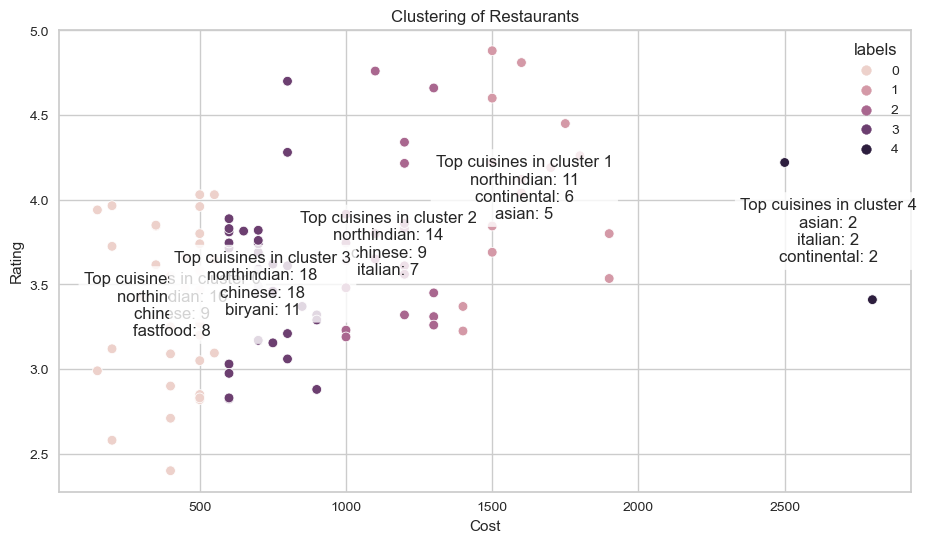

In [515]:
# Create a scatter plot of the clusters with annotations for top cuisines
plt.figure(figsize=(11,6))
sns.scatterplot(x='Cost', y='Rating', hue='labels', data=cluster_df)

# Add annotations for top cuisines in each cluster
for i, df in enumerate(list_of_cluster):
    top_cuisines = df.drop(['index', 'Name', 'Cost', 'Rating', 'labels'], axis=1).sum().sort_values(ascending=False)[:3]
    top_cuisines_str = '\n'.join([f'{cuisine}: {count}' for cuisine, count in top_cuisines.items()])
    plt.annotate(f'Top cuisines in cluster {i}\n{top_cuisines_str}', 
                 xy=(df['Cost'].mean(), df['Rating'].mean()), 
                 ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.title('Clustering of Restaurants')
plt.show()

For each cluster, the top three cuisines are identified and annotated on the plot. The annotation includes the name of the cluster, its centroid location (mean cost and mean rating), and the top three cuisines and their counts within the cluster. This plot can be used to visually identify how the restaurants are grouped and the dominant features of each cluster.

In [516]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels'],axis=1).sum(axis=0).sort_values(ascending=False)[:3],'\n')
     

Top cuisines in cluster 0
 northindian    16
chinese         9
fastfood        8
dtype: Sparse[int64, 0] 

Top cuisines in cluster 1
 northindian    11
continental     6
asian           5
dtype: Sparse[int64, 0] 

Top cuisines in cluster 2
 northindian    14
chinese         9
italian         7
dtype: Sparse[int64, 0] 

Top cuisines in cluster 3
 northindian    18
chinese        18
biryani        11
dtype: Sparse[int64, 0] 

Top cuisines in cluster 4
 asian          2
italian        2
continental    2
dtype: Sparse[int64, 0] 



# 11. Conclusion

The project was successful in achieving the goals of clustering and sentiment analysis. The clustering part provided insights into the grouping of restaurants based on their features, which can help in decision making for users and businesses. The sentiment analysis part provided insights into the sentiments expressed by the users in their reviews, which can help businesses in improving their services and user experience.

There are several potential areas for future work, such as implementing more advanced clustering algorithms and sentiment analysis techniques, incorporating more features such as images and menus of the restaurants, and exploring the relationships between the clustering and sentiment analysis results.